In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('admission_predict.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.head(9)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50


In [5]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
#renaming the columns with aprrpriate names
df=df.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOFEL','Chance of Admit ':'Probability'})
df.head()

,Serial No.,GRE,TOFEL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


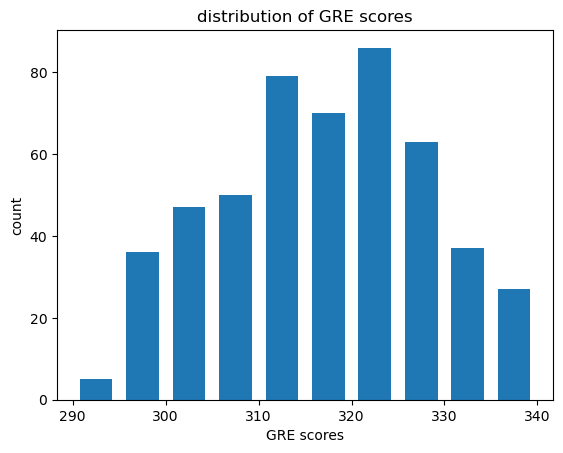

In [9]:
#visualizing the feature of GRE
fig=plt.hist(df['GRE'],rwidth=0.7)
plt.title("distribution of GRE scores")
plt.xlabel("GRE scores")
plt.ylabel("count")
plt.show()

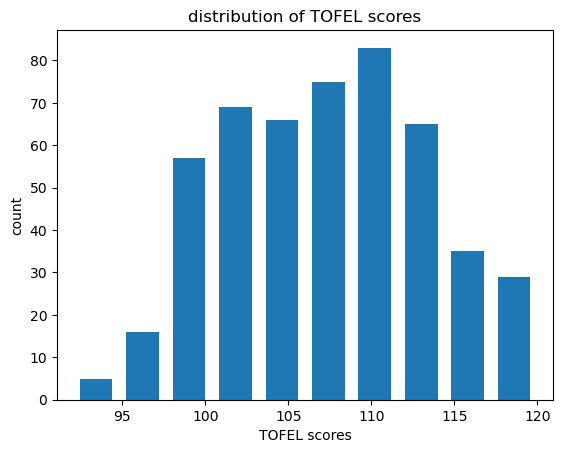

In [10]:
#visualizing the feature of TOFEL
fig=plt.hist(df['TOFEL'],rwidth=0.7)
plt.title("distribution of TOFEL scores")
plt.xlabel("TOFEL scores")
plt.ylabel("count")
plt.show()


In [11]:
#removing the serial no,column
df.drop('Serial No.',axis='columns',inplace=True)
df.head()

,GRE,TOFEL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
#replacing the 0 values from GE,TOFEL,university rating sop,lor,cgpa,by NAN
df_copy=df.copy(deep=True)
df_copy[['GRE','TOFEL','University Rating','SOP','CGPA']]=df_copy[['GRE','TOFEL','University Rating','SOP','CGPA']].replace(0,np.NAN)
df_copy.isnull().sum()

GRE                  0
TOFEL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [13]:
#data modelling
#splitting the dataset into features and labels
x=df_copy.drop('Probability',axis='columns')
y=df_copy['Probability']

In [14]:
#using the gridsearch cv to fid the best algorithm for the problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [19]:
#used for which model has the highest accuracy rate for the dataset
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

def find_best_model(x, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {}
        },
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [0.01, 0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto', 'scale'],
                'C': [0.1, 1, 10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {
                'n_estimators': [50, 100, 200],
                'criterion': ['squared_error', 'absolute_error'],  # Changed 'mae' to 'absolute_error'
                'max_depth': [None, 10, 20]
            }
        },
        'knn': {
            'model': KNeighborsRegressor(),
            'parameters': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']
            }
        }
    }

    scores = []
    for model_name, config in models.items():
        gs = GridSearchCV(config['model'], config['parameters'], cv=5, return_train_score=False, error_score='raise')
        gs.fit(x, y)
        scores.append({
            'model': model_name,
            'best_score': gs.best_score_,
            'best_parameters': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])

#Sample usage (you need to define x and y with your dataset)
#x, y = <Your feature matrix>, <Your target variable>
df = find_best_model(x, y)
print(df)





               model  best_score  \
0  linear_regression    0.810802   
1              lasso    0.749343   
2                svr    0.703892   
3      decision_tree    0.594855   
4      random_forest    0.795089   
5                knn    0.711244   

                                     best_parameters  
0                                                 {}  
1             {'alpha': 0.01, 'selection': 'cyclic'}  
2                        {'C': 10, 'gamma': 'scale'}  
3  {'criterion': 'squared_error', 'max_depth': 10...  
4  {'criterion': 'absolute_error', 'max_depth': 1...  
5          {'n_neighbors': 9, 'weights': 'distance'}  


In [16]:
#using cross_val_score for gaining highest accuraacy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LinearRegression(),x,y,cv=5)
print('highest accuracy:{}%'.format(round(sum(scores)*100/len(scores)),3))


highest accuracy:81%


In [17]:

# Splitting the dataset into train and test samples
# Creating linear regression model
from sklearn.model_selection import train_test_split

# Assuming you have your features (x) and labels (y) ready
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Checking the shapes of the training and testing datasets
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)



(400, 7) (100, 7)
(400,) (100,)


In [20]:
# Creating linear regression model
# Importing necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have your features (x) and labels (y) ready
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model (training)
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optionally, you can print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.0037046553987884084
Coefficients: [0.00243444 0.00299587 0.0025688  0.00181369 0.01723798 0.11252708
 0.02402679]
Intercept: -1.4214470719016483
